# VR Balance Training – Reproducible Analysis Notebook (R)

Make sure the following files are in the same folder before running: `UserPerformance.csv`, `SUS.csv`, `TLX.csv`, `Mid_Questionnaire.csv`.



In [ ]:
IRkernel::installspec()

## 1) Packages & Options
**What this does**: Loads the R packages used across the analysis and sets some options.

In [13]:
install.packages(c('plyr', 'rstatix', 'effectsize', 'ggpubr', 'tidyverse', 'ez', 'reshape2', 'ggplot2'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘car’, ‘performance’, ‘lme4’




In [14]:

suppressPackageStartupMessages({
  library(plyr)
  library(rstatix)
  library(effectsize)
  library(ggpubr)
  library(tidyverse)
  library(ez)
  library(reshape2)
  library(ggplot2)
})

sessionInfo()


R version 4.5.2 (2025-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.5   ez_4.4-0         lubridate_1.9.4  forcats_1.0.1   
 [5] stringr_1.6.0    dplyr_1.1.4      purrr_1.2.0      readr_2.1.6     
 [9] tidyr_1.3.1      tibble_3.3.

## 2) Data Preparation
Loads all CSVs, removes the two excluded participants (P2 and P12), and prints data summaries.

Expected outcome (per paper): Non-clinical healthy participants, with `n = 16` originally; subsequent analyses exclude two IDs for specific questionnaires/data cleaning.


In [15]:

# load data
userPerformanceData <- read.csv("UserPerformance.csv", header = TRUE, sep = ",")
SUS_Data           <- read.csv("SUS.csv", header = TRUE, sep = ",")
TLX_Data           <- read.csv("TLX.csv", header = TRUE, sep = ",")
MidQuestion_Data   <- read.csv("Mid_Questionnaire.csv", header = TRUE, sep = ",")

cat("UserPerformance preview:\n")
print(head(userPerformanceData))
cat("\nSUS preview:\n")
print(head(SUS_Data))
cat("\nTLX preview:\n")
print(head(TLX_Data))
cat("\nMid_Questionnaire preview:\n")
print(head(MidQuestion_Data))

# remove P2 and P12 per original script
userPerformanceData <- subset(userPerformanceData, PID != 2 & PID != 12)

SUS_Data <- subset(SUS_Data, UserId != 2 & UserId != 12)

TLX_Data <- subset(TLX_Data, UserId != 2 & UserId != 12)

MidQuestion_Data <- subset(MidQuestion_Data, PID != "Me336")  # P2
MidQuestion_Data <- subset(MidQuestion_Data, PID != "Ka513")  # P12

# print summaries
cat("\nSummary: userPerformanceData\n")
print(summary(userPerformanceData))

cat("\nSummary: SUS_Data\n")
print(summary(SUS_Data))

cat("\nSummary: TLX_Data\n")
print(summary(TLX_Data))

cat("\nSummary: MidQuestion_Data\n")
print(summary(MidQuestion_Data))


UserPerformance preview:
  PID     CoachingStyle    Viewpoint Pose FootHeight  Foot  LeftHandY
1   1 Controlling Style First Person    1  0.3095924  Left -0.2767009
2   1 Controlling Style First Person    2  0.3511302 Right -0.2738655
3   1 Controlling Style First Person    3  0.4272276  Left -0.2592784
4   1 Controlling Style First Person    4  0.2793536 Right -0.3854791
5   1 Controlling Style First Person    5  0.4599548  Left -0.3784874
6   1 Controlling Style First Person    6  0.3275844 Right -0.5440233
  Right.Hand.Y Steadiness Mistake
1   -0.4340669 0.15736601       0
2   -0.3177260 0.04386045       0
3   -0.6943763 0.43509793       0
4   -0.3277490 0.05773009       0
5   -0.5873152 0.20882779       0
6   -0.5016230 0.04240033       0

SUS preview:
  UserId   SUS
1      1  82.5
2      2  50.0
3      3  80.0
4      4 100.0
5      5  92.5
6      6  75.0

TLX preview:
  UserId          Type Score
1      1 Mental Demand    17
2      2 Mental Demand     7
3      3 Mental Demand    9

## 3) Descriptive Statistics
What this does: Computes descriptive statistics (mean, SD, SE) for performance variables, SUS, TLX, and mid-questionnaire subscales.

Expected outcome (per paper): Descriptives similar to Table 2 and mid/post questionnaire summaries; e.g., steadiness means lower with positive-reinforcement coaching.


In [18]:

# descriptives: performance
userPerformance_Descriptive1 <- userPerformanceData %>%
  group_by(CoachingStyle) %>%
  get_summary_stats(FootHeight, Steadiness, Mistake, type = "common")
print(userPerformance_Descriptive1)

userPerformance_Descriptive2 <- userPerformanceData %>%
  group_by(CoachingStyle, Viewpoint) %>%
  get_summary_stats(FootHeight, Steadiness, Mistake, type = "common")
print(userPerformance_Descriptive2)

#  SUS
SUS_Descriptive <- SUS_Data %>% get_summary_stats(SUS, type = "common")
print(SUS_Descriptive)

#  TLX
TLX_Descriptive <- TLX_Data %>% group_by(Type) %>%
  get_summary_stats(Score, type = "common")
print(TLX_Descriptive)

#  Mid-Questionnaire
MidQuestion_Descriptive <- MidQuestion_Data %>%
  group_by(Coaching.Style, Viewpoint) %>%
  get_summary_stats(Embodiment, Social_Presence, Enjoyment, Difficulty, PerceptionCoach, Recommendation, type = "common")
print(MidQuestion_Descriptive)


# A tibble: 6 × 11
  CoachingStyle  variable     n   min   max median   iqr  mean    sd    se    ci
  <chr>          <fct>    <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Autonomous St… FootHei…   192 0     0.795  0.306 0.178 0.307 0.144 0.01  0.021
2 Autonomous St… Steadin…   192 0     0.521  0.104 0.142 0.13  0.107 0.008 0.015
3 Autonomous St… Mistake    192 0     5      1     1     0.88  1.07  0.077 0.152
4 Controlling S… FootHei…   192 0.007 0.889  0.299 0.173 0.308 0.135 0.01  0.019
5 Controlling S… Steadin…   192 0.003 0.445  0.077 0.103 0.099 0.09  0.007 0.013
6 Controlling S… Mistake    192 0     5      0.5   1     0.833 1.04  0.075 0.149
# A tibble: 12 × 12
   CoachingStyle   Viewpoint variable     n   min   max median   iqr  mean    sd
   <chr>           <chr>     <fct>    <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>
 1 Autonomous Sty… First Pe… FootHei…    96 0.025 0.795  0.299 0.158 0.298 0.134
 2 Autonomous Sty… First Pe… Steadin…    96 0.001 0.307  0.062 0.09  0

## 4) Factor Setup & ANOVA (Within-Subjects 2×2)
Converts IDs and factors, then runs two-way repeated-measures ANOVA (coaching style × viewpoint) for FootHeight, Steadiness, and Mistake using ezANOVA.

Expected outcome:
Steadiness: Significant main effects (style, viewpoint) and interaction; steadiness better (lower variation) in positive-reinforcement; first-person steadier within autonomous-supportive.
Foot Height: No significant effects.
Mistakes: No significant effects.


In [19]:

#  Factors
userPerformanceData$PID           <- as.factor(userPerformanceData$PID)
userPerformanceData$CoachingStyle <- as.factor(userPerformanceData$CoachingStyle)
userPerformanceData$Viewpoint     <- as.factor(userPerformanceData$Viewpoint)

#  ANOVAs
cat("\nANOVA: FootHeight\n")
analysisData_Foot.aov <- ezANOVA(
  data = userPerformanceData,
  dv = FootHeight, wid = PID,
  within = .(Viewpoint, CoachingStyle),
  detailed = TRUE
)
print(analysisData_Foot.aov)

cat("\nANOVA: Steadiness\n")
analysisData_Steadiness.aov <- ezANOVA(
  data = userPerformanceData,
  dv = Steadiness, wid = PID,
  within = .(CoachingStyle, Viewpoint),
  detailed = TRUE
)
print(analysisData_Steadiness.aov)

cat("\nANOVA: Mistake\n")
analysisData_Mistake.aov <- ezANOVA(
  data = userPerformanceData,
  dv = Mistake, wid = PID,
  within = .(CoachingStyle, Viewpoint),
  detailed = TRUE
)
print(analysisData_Mistake.aov)



ANOVA: FootHeight


Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”


$ANOVA
                   Effect DFn DFd          SSn         SSd            F
1             (Intercept)   1  15 6.054114e+00 0.506732923 179.21020576
2               Viewpoint   1  15 7.060254e-03 0.031372013   3.37574181
3           CoachingStyle   1  15 1.376684e-05 0.006882933   0.03000212
4 Viewpoint:CoachingStyle   1  15 6.793097e-05 0.019150306   0.05320879
             p p<.05          ges
1 9.564110e-10     * 9.147602e-01
2 8.605396e-02       1.236042e-02
3 8.648011e-01       2.440272e-05
4 8.206875e-01       1.204010e-04


ANOVA: Steadiness


Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”


$ANOVA
                   Effect DFn DFd        SSn        SSd          F            p
1             (Intercept)   1  15 0.83259194 0.06434981 194.077942 5.485866e-10
2           CoachingStyle   1  15 0.01534485 0.02410878   9.547259 7.470289e-03
3               Viewpoint   1  15 0.04589008 0.04144832  16.607459 9.950213e-04
4 CoachingStyle:Viewpoint   1  15 0.03042098 0.01700706  26.830899 1.119899e-04
  p<.05        ges
1     * 0.85001217
2     * 0.09457021
3     * 0.23801409
4     * 0.17154533


ANOVA: Mistake


Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”


$ANOVA
                   Effect DFn DFd         SSn        SSd          F
1             (Intercept)   1  15 46.97960069 28.6523438 24.5946376
2           CoachingStyle   1  15  0.03515625  0.4301215  1.2260343
3               Viewpoint   1  15  0.03515625  2.8745660  0.1834516
4 CoachingStyle:Viewpoint   1  15  0.07335069  2.7252604  0.4037267
             p p<.05         ges
1 0.0001713826     * 0.575294049
2 0.2856204677       0.001012639
3 0.6745101952       0.001012639
4 0.5347447384       0.002110469



## 5) Pairwise t-Tests
Post-hoc paired tests for Steadiness, FootHeight and Mistake across coaching styles and viewpoints (including per-pose breakdowns).

Expected outcome (per paper For steadiness, significant differences favoring positive-reinforcement and first-person (within autonomous-supportive), and pose-level effects predominantly when lifting the right foot.


In [20]:

#  Steadiness
cat("\nPairwise t-tests: Steadiness by Viewpoint\n")
print(userPerformanceData %>% pairwise_t_test(Steadiness ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPairwise t-tests: Steadiness by CoachingStyle\n")
print(userPerformanceData %>% pairwise_t_test(Steadiness ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPairwise t-tests: Steadiness CoachingStyle within Viewpoint\n")
print(userPerformanceData %>% group_by(Viewpoint) %>%
  pairwise_t_test(Steadiness ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPairwise t-tests: Steadiness Viewpoint within CoachingStyle\n")
print(userPerformanceData %>% group_by(CoachingStyle) %>%
  pairwise_t_test(Steadiness ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPose-level: Steadiness CoachingStyle within Viewpoint per Pose\n")
print(userPerformanceData %>% group_by(Pose, Viewpoint) %>%
  pairwise_t_test(Steadiness ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPose-level: Steadiness Viewpoint within CoachingStyle per Pose\n")
print(userPerformanceData %>% group_by(Pose, CoachingStyle) %>%
  pairwise_t_test(Steadiness ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))



Pairwise t-tests: Steadiness by Viewpoint
# A tibble: 1 × 10
  .y.     group1 group2    n1    n2 statistic    df       p   p.adj p.adj.signif
* <chr>   <chr>  <chr>  <int> <int>     <dbl> <dbl>   <dbl>   <dbl> <chr>       
1 Steadi… First… Third…   192   192     -6.41   191 1.13e-9 1.13e-9 ****        

Pairwise t-tests: Steadiness by CoachingStyle
# A tibble: 1 × 10
  .y.     group1 group2    n1    n2 statistic    df       p   p.adj p.adj.signif
* <chr>   <chr>  <chr>  <int> <int>     <dbl> <dbl>   <dbl>   <dbl> <chr>       
1 Steadi… Auton… Contr…   192   192      3.91   191 1.26e-4 1.26e-4 ***         

Pairwise t-tests: Steadiness CoachingStyle within Viewpoint
# A tibble: 2 × 11
  Viewpoint    .y.     group1 group2    n1    n2 statistic    df       p   p.adj
* <fct>        <chr>   <chr>  <chr>  <int> <int>     <dbl> <dbl>   <dbl>   <dbl>
1 First Person Steadi… Auton… Contr…    96    96     -1.59    95 1.16e-1 1.16e-1
2 Third Person Steadi… Auton… Contr…    96    96      6.12    9

In [21]:

#  Foot Height
cat("\nPairwise t-tests: FootHeight Viewpoint within CoachingStyle\n")
print(userPerformanceData %>% group_by(CoachingStyle) %>%
  pairwise_t_test(FootHeight ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPose-level: FootHeight Viewpoint within CoachingStyle per Pose\n")
print(userPerformanceData %>% group_by(CoachingStyle, Pose) %>%
  pairwise_t_test(FootHeight ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPose-level: FootHeight CoachingStyle within Viewpoint per Pose\n")
print(userPerformanceData %>% group_by(Viewpoint, Pose) %>%
  pairwise_t_test(FootHeight ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf"))



Pairwise t-tests: FootHeight Viewpoint within CoachingStyle
# A tibble: 2 × 11
  CoachingStyle     .y.    group1 group2    n1    n2 statistic    df     p p.adj
* <fct>             <chr>  <chr>  <chr>  <int> <int>     <dbl> <dbl> <dbl> <dbl>
1 Autonomous Style  FootH… First… Third…    96    96     -1.41    95 0.16  0.16 
2 Controlling Style FootH… First… Third…    96    96     -2.17    95 0.032 0.032
# ℹ 1 more variable: p.adj.signif <chr>

Pose-level: FootHeight Viewpoint within CoachingStyle per Pose
# A tibble: 12 × 12
   CoachingStyle      Pose .y.   group1 group2    n1    n2 statistic    df     p
 * <fct>             <int> <chr> <chr>  <chr>  <int> <int>     <dbl> <dbl> <dbl>
 1 Autonomous Style      1 Foot… First… Third…    16    16    -2.96     15 0.01 
 2 Autonomous Style      2 Foot… First… Third…    16    16    -1.68     15 0.113
 3 Autonomous Style      3 Foot… First… Third…    16    16     0.548    15 0.592
 4 Autonomous Style      4 Foot… First… Third…    16    16     1.30

In [22]:

#  Number of Mistakes
cat("\nPose-level: Mistake Viewpoint within CoachingStyle per Pose\n")
print(userPerformanceData %>% group_by(CoachingStyle, Pose) %>%
  pairwise_t_test(Mistake ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPose-level: Mistake CoachingStyle within Viewpoint per Pose\n")
print(userPerformanceData %>% group_by(Viewpoint, Pose) %>%
  pairwise_t_test(Mistake ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf"))



Pose-level: Mistake Viewpoint within CoachingStyle per Pose
# A tibble: 12 × 12
   CoachingStyle      Pose .y.   group1 group2    n1    n2 statistic    df     p
 * <fct>             <int> <chr> <chr>  <chr>  <int> <int>     <dbl> <dbl> <dbl>
 1 Autonomous Style      1 Mist… First… Third…    16    16     0.939    15 0.362
 2 Autonomous Style      2 Mist… First… Third…    16    16     1.70     15 0.11 
 3 Autonomous Style      3 Mist… First… Third…    16    16    -0.126    15 0.901
 4 Autonomous Style      4 Mist… First… Third…    16    16    -1.32     15 0.206
 5 Autonomous Style      5 Mist… First… Third…    16    16     0.460    15 0.652
 6 Autonomous Style      6 Mist… First… Third…    16    16     0.808    15 0.432
 7 Controlling Style     1 Mist… First… Third…    16    16     2.24     15 0.041
 8 Controlling Style     2 Mist… First… Third…    16    16    -3.16     15 0.006
 9 Controlling Style     3 Mist… First… Third…    16    16    -0.355    15 0.728
10 Controlling Style     4 M

## 6) Mid-Questionnaire Pairwise Tests
Paired t-tests for Enjoyment, Difficulty, Embodiment, Social Presence, Perception of Coach, and Recommendation.

Expected outcome (per paper):
Enjoyment & Recommendation: Higher for positive-reinforcement.
Difficulty: Lower for positive-reinforcement.
Embodiment: Higher for third-person (significant viewpoint effect).
Perception of Coach: Substantially higher in positive-reinforcement, both viewpoints.


In [23]:

cat("\nEnjoyment by Coaching.Style\n")
print(MidQuestion_Data %>% pairwise_t_test(Enjoyment ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))

cat("\nDifficulty by Coaching.Style\n")
print(MidQuestion_Data %>% pairwise_t_test(Difficulty ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))

cat("\nEmbodiment by Viewpoint\n")
print(MidQuestion_Data %>% pairwise_t_test(Embodiment ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf"))

cat("\nSocial Presence by Coaching.Style within Viewpoint\n")
print(MidQuestion_Data %>% group_by(Viewpoint) %>%
  pairwise_t_test(Social_Presence ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPerception of Coach by Coaching.Style\n")
print(MidQuestion_Data %>% pairwise_t_test(PerceptionCoach ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))

cat("\nPerception of Coach by Coaching.Style within Viewpoint\n")
print(MidQuestion_Data %>% group_by(Viewpoint) %>%
  pairwise_t_test(PerceptionCoach ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))

cat("\nRecommendation by Coaching.Style\n")
print(MidQuestion_Data %>% pairwise_t_test(Recommendation ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))

cat("\nRecommendation by Coaching.Style within Viewpoint\n")
print(MidQuestion_Data %>% group_by(Viewpoint) %>%
  pairwise_t_test(Recommendation ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf"))



Enjoyment by Coaching.Style
# A tibble: 1 × 10
  .y.       group1   group2    n1    n2 statistic    df     p p.adj p.adj.signif
* <chr>     <chr>    <chr>  <int> <int>     <dbl> <dbl> <dbl> <dbl> <chr>       
1 Enjoyment Autonom… Contr…    32    32     -2.17    31 0.037 0.037 *           

Difficulty by Coaching.Style
# A tibble: 1 × 10
  .y.        group1  group2    n1    n2 statistic    df     p p.adj p.adj.signif
* <chr>      <chr>   <chr>  <int> <int>     <dbl> <dbl> <dbl> <dbl> <chr>       
1 Difficulty Autono… Contr…    32    32      2.17    31 0.037 0.037 *           

Embodiment by Viewpoint
# A tibble: 1 × 10
  .y.        group1  group2    n1    n2 statistic    df     p p.adj p.adj.signif
* <chr>      <chr>   <chr>  <int> <int>     <dbl> <dbl> <dbl> <dbl> <chr>       
1 Embodiment First … Third…    32    32     -2.78    31 0.009 0.009 **          

Social Presence by Coaching.Style within Viewpoint
# A tibble: 2 × 11
  Viewpoint    .y.         group1 group2    n1    n2 statis

## 7) Visualization – User Performance (Overall)
Replicates the paper’s Figure 5 style: boxplots for Steadiness and FootHeight and bars for Mistake across coaching styles and viewpoints. Mean markers shown; significance annotations added where available.

Expected outcome (per paper
Steadiness: Lower (better) for positive-reinforcement and first-person (within autonomous-supportive).
Foot Height / Mistake**: No significant differences.


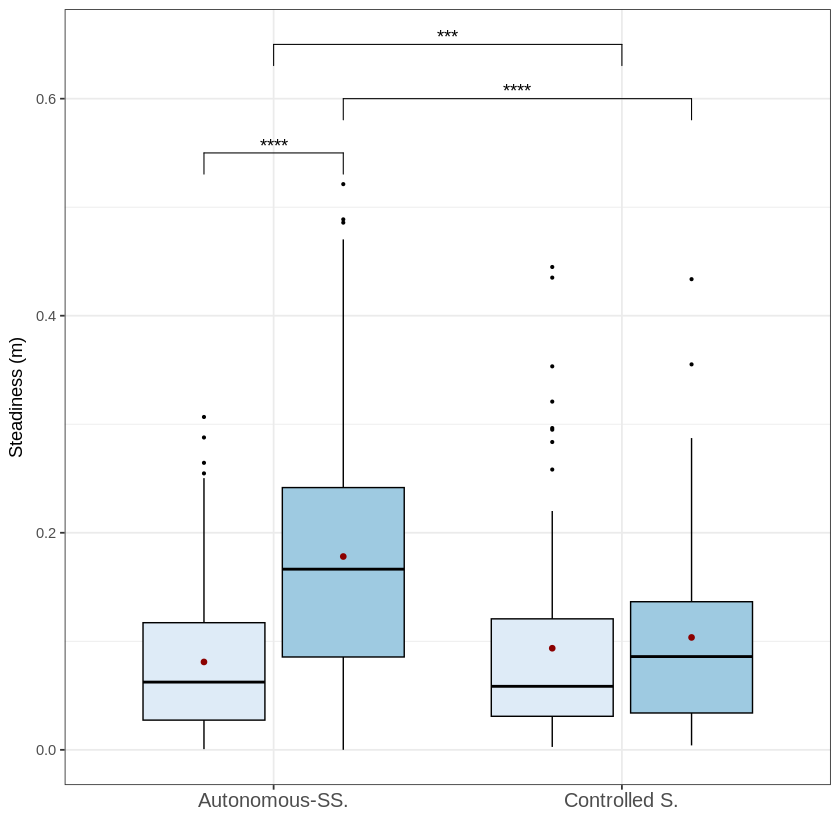

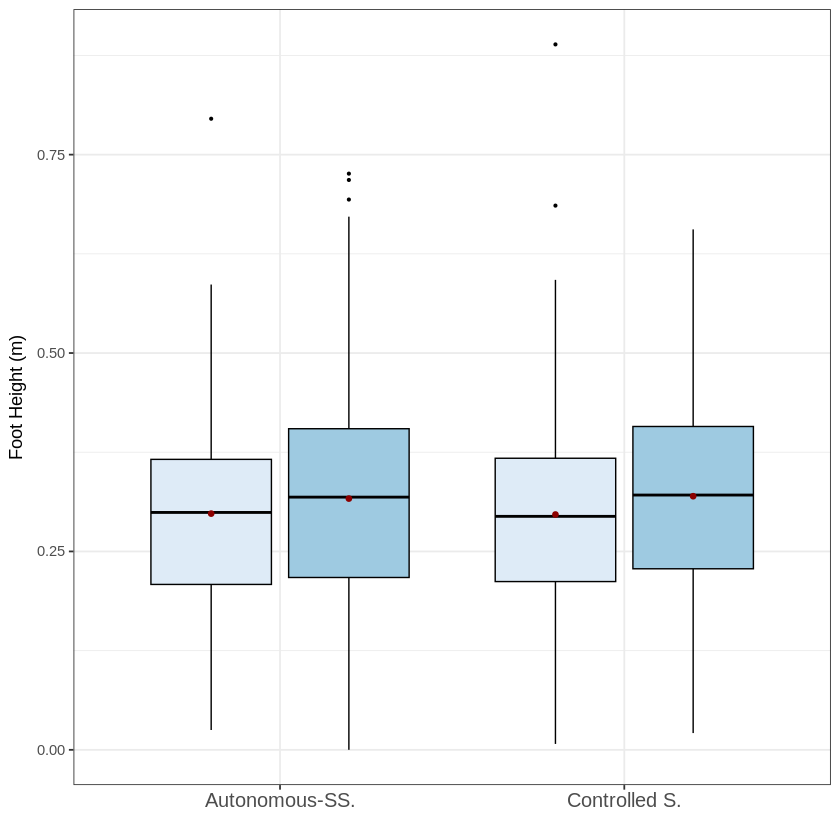

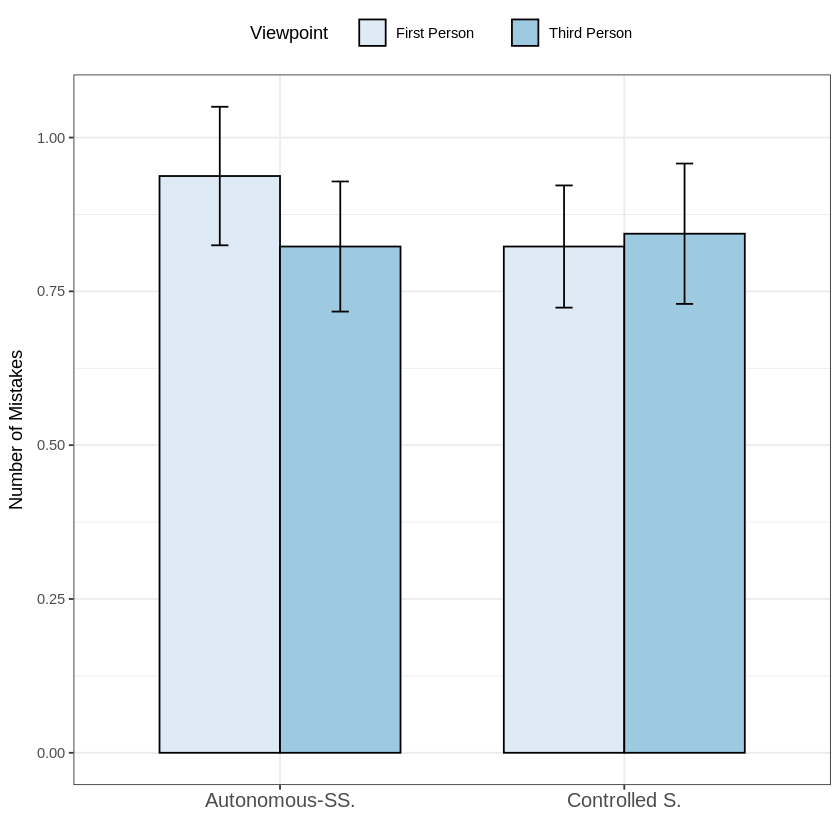

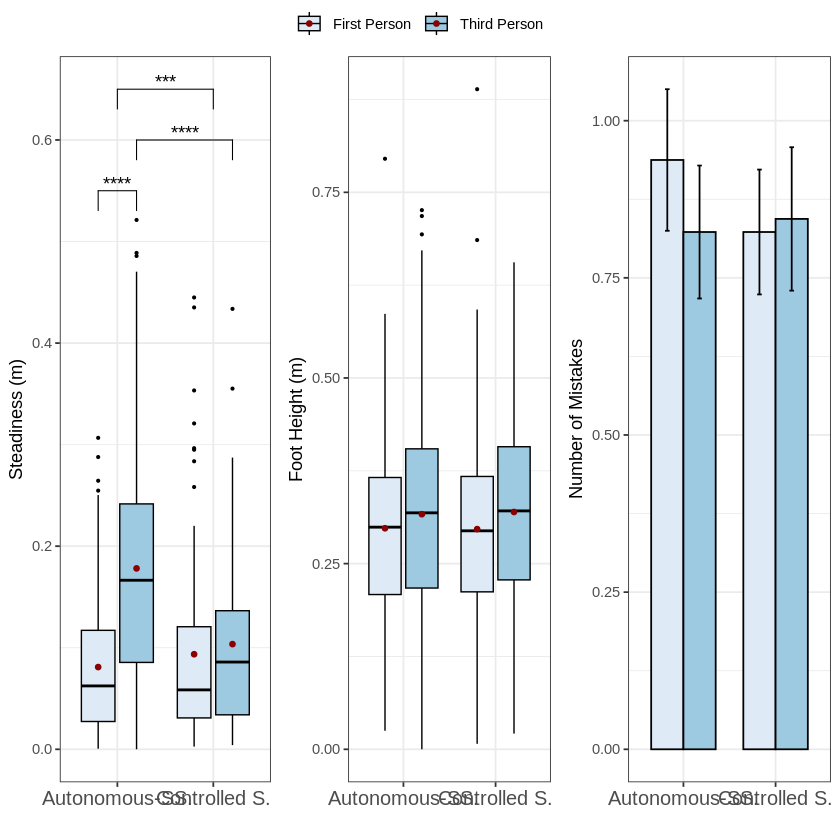

In [24]:

#  Friendly names
userPerformanceData$CoachingStyle <- mapvalues(
  userPerformanceData$CoachingStyle,
  from = c("Autonomous Style", "Controlling Style"),
  to   = c("Autonomous-Supportive Style", "Controlled Style")
)
userPerformanceData$CoachingStyleName <- mapvalues(
  userPerformanceData$CoachingStyle,
  from = c("Autonomous-Supportive Style", "Controlled Style"),
  to   = c("Autonomous-SS.", "Controlled S.")
)

#  Stats for Steadiness overlays
stat_Score.test <- userPerformanceData %>%
  group_by(CoachingStyle) %>%
  pairwise_t_test(Steadiness ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyle")

stat_Score.test1 <- userPerformanceData %>%
  group_by(Viewpoint) %>%
  pairwise_t_test(Steadiness ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyle", group = "Viewpoint")

stat_Score.test2 <- userPerformanceData %>%
  pairwise_t_test(Steadiness ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyle")

#  Steadiness
newplot1 <- ggboxplot(
  userPerformanceData, x = "CoachingStyleName", y = "Steadiness",
  fill = "Viewpoint", palette = "Blues", size = .4, bxp.errorbar.width = 0.1, outlier.size = 0.5
) +
  labs(x = "", y = "Steadiness (m)") +
  stat_summary(aes(fill = Viewpoint), position = position_dodge(width = .8),
               fun = mean, geom = "point", shape = 20, size = 2, color = "darkred") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(), legend.position = "none")

if (nrow(stat_Score.test)  > 0) newplot1 <- newplot1 + stat_pvalue_manual(stat_Score.test,  label = "p.adj.signif", y.position = 0.55)
if (nrow(stat_Score.test1) > 0) newplot1 <- newplot1 + stat_pvalue_manual(stat_Score.test1, label = "p.adj.signif", y.position = 0.60)
if (nrow(stat_Score.test2) > 0) newplot1 <- newplot1 + stat_pvalue_manual(stat_Score.test2, label = "p.adj.signif", y.position = 0.65)

print(newplot1)

#  Foot Height
newplot2 <- ggboxplot(
  userPerformanceData, x = "CoachingStyleName", y = "FootHeight",
  fill = "Viewpoint", palette = "Blues", size = .4, bxp.errorbar.width = 0.1, outlier.size = 0.5
) +
  labs(x = "", y = "Foot Height (m)") +
  stat_summary(aes(fill = Viewpoint), position = position_dodge(width = .8),
               fun = mean, geom = "point", shape = 20, size = 2, color = "darkred") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(), legend.position = "none")
print(newplot2)

#  Mistakes
newplot3 <- ggbarplot(
  userPerformanceData, x = "CoachingStyleName", y = "Mistake",
  fill = "Viewpoint", color = "black", palette = "Blues",
  position = position_dodge(0.7),
  add = "mean_se"
) +
  labs(x = "", y = "Number of Mistakes") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")
print(newplot3)

ggarrange(newplot1, newplot2, newplot3, ncol = 3, nrow = 1, common.legend = TRUE)


## 8) Visualization – Per-Pose Steadiness
Per-pose boxplots of Steadiness split by Viewpoint and CoachingStyle, including significance annotations.

Expected outcome (per paper): Significant differences on poses that lift the right foot in third-person for style comparisons; first-person more stable than third-person within autonomous-supportive for multiple poses.


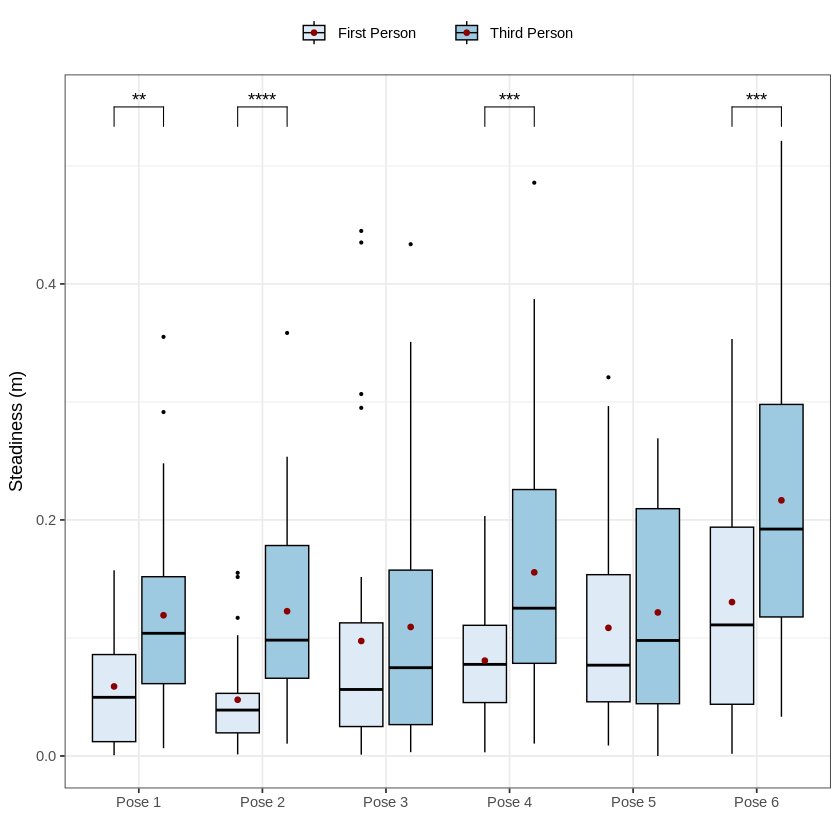

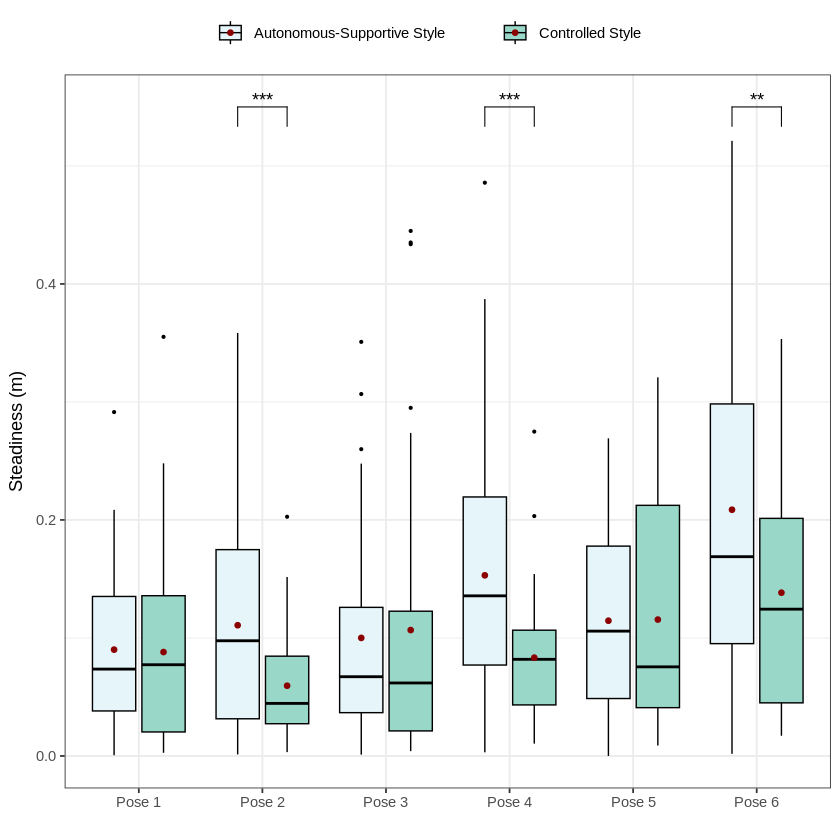

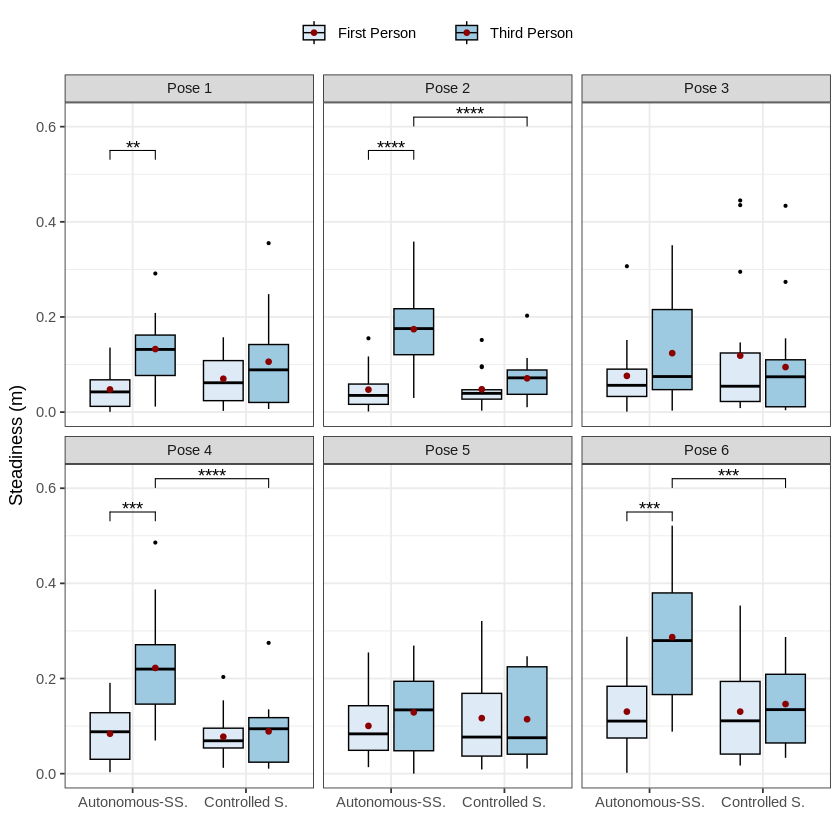

In [25]:

#  Pose labels
userPerformanceData$PoseName <- mapvalues(
  userPerformanceData$Pose,
  from = c("1","2","3","4","5","6"),
  to   = c("Pose 1","Pose 2","Pose 3","Pose 4","Pose 5","Pose 6")
)

#  Viewpoint comparisons per pose
stat_viewpoint.test <- userPerformanceData %>%
  group_by(Pose) %>%
  pairwise_t_test(Steadiness ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Pose")

poseViewpointPlot <- ggboxplot(
  userPerformanceData, x = "PoseName", y = "Steadiness",
  fill = "Viewpoint", palette = "Blues", size = .4, bxp.errorbar.width = 0.1, outlier.size = 0.5
) +
  labs(x = "", y = "Steadiness (m)") +
  stat_summary(aes(fill = Viewpoint), position = position_dodge(width = .8),
               fun = mean, geom = "point", shape = 20, size = 2, color = "darkred") +
  theme_bw() +
  theme(legend.title = element_blank(), legend.position = "top")

if (nrow(stat_viewpoint.test) > 0) poseViewpointPlot <- poseViewpointPlot + stat_pvalue_manual(stat_viewpoint.test, label = "p.adj.signif", y.position = 0.55)
print(poseViewpointPlot)

#  Coaching style comparisons per pose
stat_style.test <- userPerformanceData %>%
  group_by(Pose) %>%
  pairwise_t_test(Steadiness ~ CoachingStyle, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Pose")

poseStylePlot <- ggboxplot(
  userPerformanceData, x = "PoseName", y = "Steadiness",
  fill = "CoachingStyle", palette = "BuGn", size = .4, bxp.errorbar.width = 0.1, outlier.size = 0.5
) +
  labs(x = "", y = "Steadiness (m)") +
  stat_summary(aes(fill = CoachingStyle), position = position_dodge(width = .8),
               fun = mean, geom = "point", shape = 20, size = 2, color = "darkred") +
  theme_bw() +
  theme(legend.title = element_blank(), legend.position = "top")

if (nrow(stat_style.test) > 0) poseStylePlot <- poseStylePlot + stat_pvalue_manual(stat_style.test, label = "p.adj.signif", y.position = 0.55)
print(poseStylePlot)

#  Combined facets
stat_combine.test <- userPerformanceData %>%
  group_by(CoachingStyleName, PoseName) %>%
  pairwise_t_test(Steadiness ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyleName")

stat_combine1.test <- userPerformanceData %>%
  group_by(Viewpoint, PoseName) %>%
  pairwise_t_test(Steadiness ~ CoachingStyleName, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position("CoachingStyleName", group = "Viewpoint")

poseCombinedPlot <- ggboxplot(
  userPerformanceData, x = "CoachingStyleName", y = "Steadiness", fill = "Viewpoint",
  facet.by = "PoseName", palette = "Blues", size = .4, bxp.errorbar.width = 0.1, outlier.size = 0.5
) +
  labs(x = "", y = "Steadiness (m)") +
  stat_summary(aes(fill = Viewpoint), position = position_dodge(width = .8),
               fun = mean, geom = "point", shape = 20, size = 2, color = "darkred") +
  theme_bw() +
  theme(legend.title = element_blank(), legend.position = "top")

if (nrow(stat_combine.test)  > 0) poseCombinedPlot <- poseCombinedPlot + stat_pvalue_manual(stat_combine.test,  label = "p.adj.signif", y.position = 0.55)
if (nrow(stat_combine1.test) > 0) poseCombinedPlot <- poseCombinedPlot + stat_pvalue_manual(stat_combine1.test, label = "p.adj.signif", y.position = 0.62)

print(poseCombinedPlot)


## 9) Visualization – Per-Pose Foot Height & Mistakes
Faceted plots for FootHeight (boxplots) and Mistake (bar + SE) per pose, with annotations when significant.

Expected outcome (per paper): No significant effects overall for foot height or mistakes.


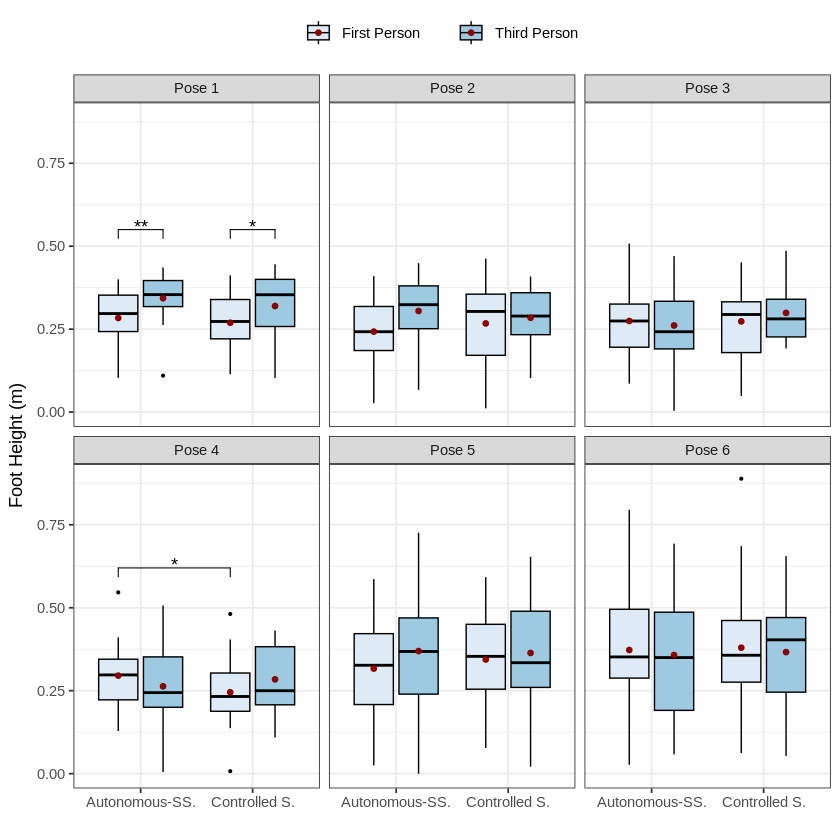

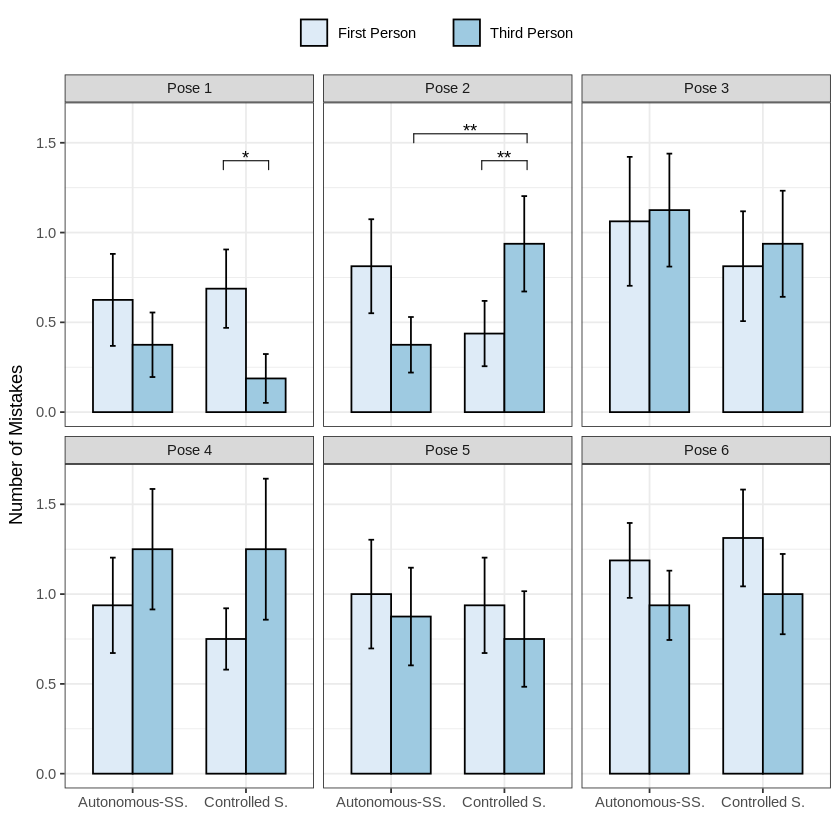

In [26]:

#  Foot Height facets
stat_footpose.test <- userPerformanceData %>%
  group_by(CoachingStyleName, PoseName) %>%
  pairwise_t_test(FootHeight ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyleName")

stat_footpose1.test <- userPerformanceData %>%
  group_by(Viewpoint, PoseName) %>%
  pairwise_t_test(FootHeight ~ CoachingStyleName, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyleName", group = "Viewpoint")

poseFootPlot <- ggboxplot(
  userPerformanceData, x = "CoachingStyleName", y = "FootHeight", fill = "Viewpoint",
  facet.by = "PoseName", palette = "Blues", size = .4, bxp.errorbar.width = 0.1, outlier.size = 0.5
) +
  labs(x = "", y = "Foot Height (m)") +
  stat_summary(aes(fill = Viewpoint), position = position_dodge(width = .8),
               fun = mean, geom = "point", shape = 20, size = 2, color = "darkred") +
  theme_bw() +
  theme(legend.title = element_blank(), legend.position = "top")

if (nrow(stat_footpose.test)  > 0) poseFootPlot <- poseFootPlot + stat_pvalue_manual(stat_footpose.test,  label = "p.adj.signif", y.position = 0.55)
if (nrow(stat_footpose1.test) > 0) poseFootPlot <- poseFootPlot + stat_pvalue_manual(stat_footpose1.test, label = "p.adj.signif", y.position = 0.62)

print(poseFootPlot)

#  Mistakes facets
stat_mistake.test <- userPerformanceData %>%
  group_by(CoachingStyleName, PoseName) %>%
  pairwise_t_test(Mistake ~ Viewpoint, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyleName")

stat_mistake1.test <- userPerformanceData %>%
  group_by(Viewpoint, PoseName) %>%
  pairwise_t_test(Mistake ~ CoachingStyleName, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "CoachingStyleName", group = "Viewpoint")

poseMistakePlot <- ggbarplot(
  userPerformanceData, x = "CoachingStyleName", y = "Mistake",
  fill = "Viewpoint", color = "black", palette = "Blues", facet.by = "PoseName",
  position = position_dodge(0.7), add = "mean_se"
) +
  labs(x = "", y = "Number of Mistakes") +
  theme_bw() +
  theme(legend.title = element_blank(), legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")

if (nrow(stat_mistake.test)  > 0) poseMistakePlot <- poseMistakePlot + stat_pvalue_manual(stat_mistake.test,  label = "p.adj.signif", y.position = 1.4,  tip.length = .01)
if (nrow(stat_mistake1.test) > 0) poseMistakePlot <- poseMistakePlot + stat_pvalue_manual(stat_mistake1.test, label = "p.adj.signif", y.position = 1.55, tip.length = .01)

print(poseMistakePlot)


## 10) TLX Visualization
Recreates the NASA-TLX bar chart with mean ± SE for all six dimensions.

Expected outcome (per paper): Highest ratings for Performance (reverse-scored) Physical Demand, and Effort, with relatively lower Mental/Temporal Demand and Frustration.


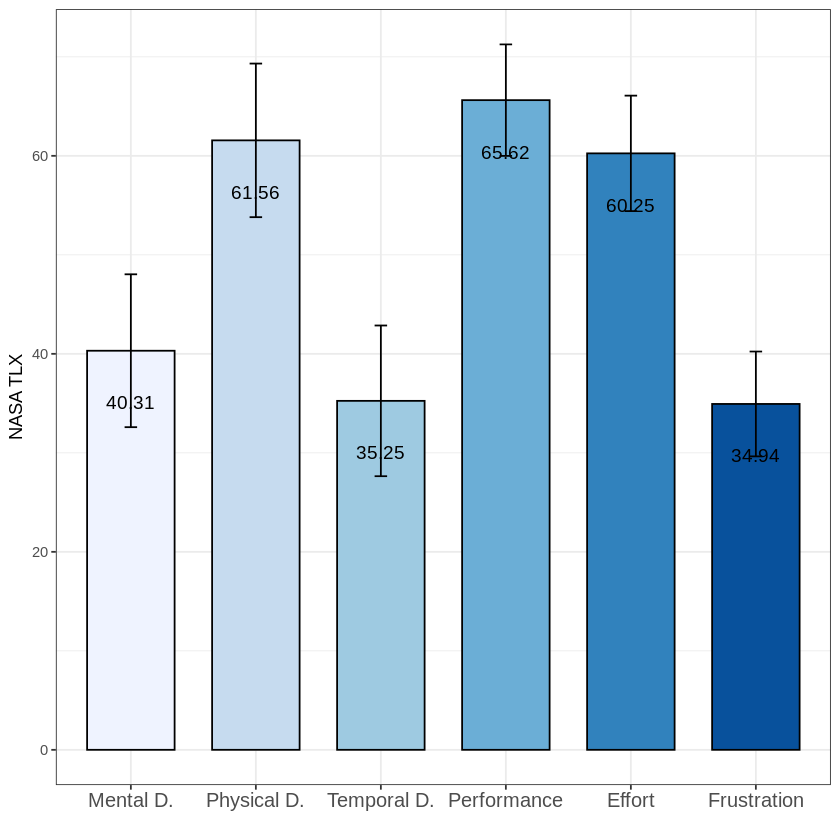

In [27]:

TLX_Data$TypeName <- mapvalues(
  TLX_Data$Type,
  from = c("Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"),
  to   = c("Mental D.", "Physical D.", "Temporal D.", "Performance", "Effort", "Frustration")
)

p_tlx <- ggbarplot(
  TLX_Data, x = "TypeName", y = "Score",
  fill = "TypeName", palette = "Blues",
  position = position_dodge(.75),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 4.5
) +
  labs(x = "", y = "NASA TLX") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA),
        legend.position = "none")
print(p_tlx)


## 11) Mid-Questionnaire Visualizations
 Recreates the mid-questionnaire figure with six panels: Social Presence, Embodiment, Enjoyment, Difficulty, Perception of Coach, and Recommendation. Significance bars are added where applicable.

Expected outcome (per paper):
Enjoyment & Recommendation higher for positive-reinforcement.
Difficulty lower for positive-reinforcement.
Embodiment higher in third-person.
Perception of Coach markedly higher in positive-reinforcement (both viewpoints).


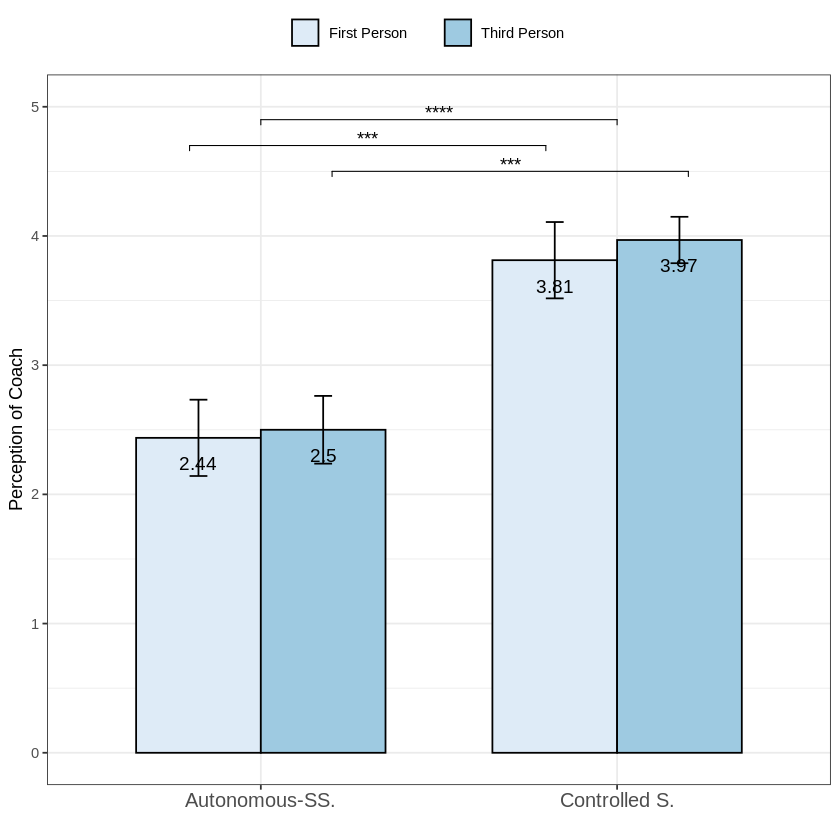

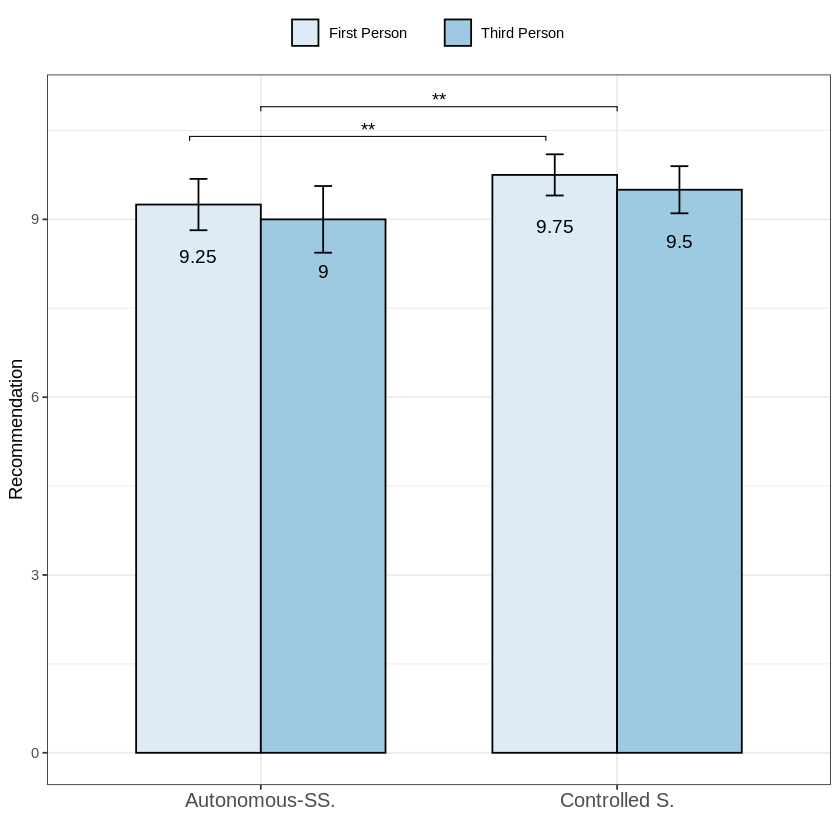

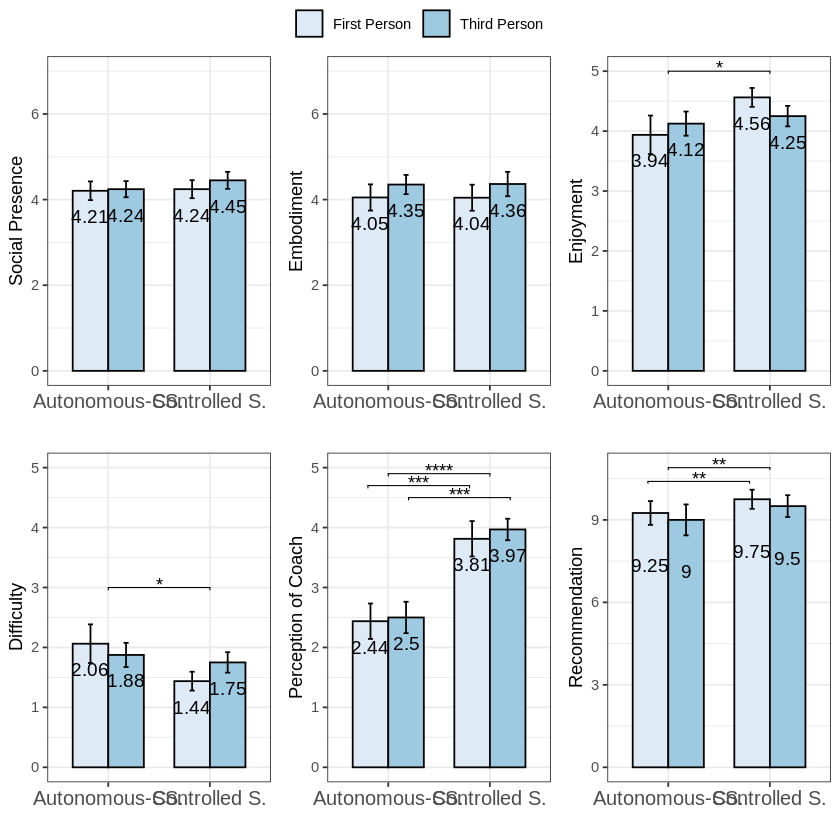

In [28]:

# Embodiment
Mid_plot1 <- ggbarplot(
  MidQuestion_Data, x = "Coaching.Style", y = "Embodiment",
  fill = "Viewpoint", palette = "Blues", order = c("Autonomous-SS.", "Controlled S."),
  position = position_dodge(.7), ylim = c(0, 7),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 2.5
) +
  labs(x = "", y = "Embodiment") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")

# Social Presence
Mid_plot2 <- ggbarplot(
  MidQuestion_Data, x = "Coaching.Style", y = "Social_Presence",
  fill = "Viewpoint", palette = "Blues", order = c("Autonomous-SS.", "Controlled S."),
  position = position_dodge(.7), ylim = c(0, 7),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 2.5
) +
  labs(x = "", y = "Social Presence") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")

# Enjoyment (+ stats)
stat_enjoyment.test <- MidQuestion_Data %>%
  pairwise_t_test(Enjoyment ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Coaching.Style")

Mid_plot3 <- ggbarplot(
  MidQuestion_Data, x = "Coaching.Style", y = "Enjoyment",
  fill = "Viewpoint", palette = "Blues", order = c("Autonomous-SS.", "Controlled S."),
  position = position_dodge(.7), ylim = c(0, 5),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 2.5
) +
  labs(x = "", y = "Enjoyment") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")
if (nrow(stat_enjoyment.test) > 0) Mid_plot3 <- Mid_plot3 + stat_pvalue_manual(stat_enjoyment.test, label = "p.adj.signif", y.position = 5, tip.length = .01)

# Difficulty (+ stats)
stat_difficulty.test <- MidQuestion_Data %>%
  pairwise_t_test(Difficulty ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Coaching.Style")

Mid_plot4 <- ggbarplot(
  MidQuestion_Data, x = "Coaching.Style", y = "Difficulty",
  fill = "Viewpoint", palette = "Blues", order = c("Autonomous-SS.", "Controlled S."),
  position = position_dodge(.7), ylim = c(0, 5),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 2.5
) +
  labs(x = "", y = "Difficulty") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")
if (nrow(stat_difficulty.test) > 0) Mid_plot4 <- Mid_plot4 + stat_pvalue_manual(stat_difficulty.test, label = "p.adj.signif", y.position = 3, tip.length = .01)

# Perception of Coach (+ stats)
stat_perception.test <- MidQuestion_Data %>%
  pairwise_t_test(PerceptionCoach ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Coaching.Style")

stat_perception.test11 <- MidQuestion_Data %>%
  group_by(Viewpoint) %>%
  pairwise_t_test(PerceptionCoach ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf")

stat_perception.test1 <- stat_perception.test11 %>%
  filter(p < 0.05, Viewpoint == "First Person") %>%
  add_xy_position(x = "Coaching.Style", group = "Viewpoint")

stat_perception.test2 <- stat_perception.test11 %>%
  filter(p < 0.05, Viewpoint == "Third Person") %>%
  add_xy_position(x = "Coaching.Style", group = "Viewpoint")

Mid_plot5 <- ggbarplot(
  MidQuestion_Data, x = "Coaching.Style", y = "PerceptionCoach",
  fill = "Viewpoint", palette = "Blues", order = c("Autonomous-SS.", "Controlled S."),
  position = position_dodge(.7), ylim = c(0, 5),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 2.5
) +
  labs(x = "", y = "Perception of Coach") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")

if (nrow(stat_perception.test)  > 0) Mid_plot5 <- Mid_plot5 + stat_pvalue_manual(stat_perception.test,  label = "p.adj.signif", y.position = 4.9, tip.length = .01)
if (nrow(stat_perception.test1) > 0) Mid_plot5 <- Mid_plot5 + stat_pvalue_manual(stat_perception.test1, label = "p.adj.signif", y.position = 4.7, tip.length = .01)
if (nrow(stat_perception.test2) > 0) Mid_plot5 <- Mid_plot5 + stat_pvalue_manual(stat_perception.test2, label = "p.adj.signif", y.position = 4.5, tip.length = .01)

print(Mid_plot5)

# Recommendation (+ stats)
stat_recommend.test <- MidQuestion_Data %>%
  pairwise_t_test(Recommendation ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Coaching.Style")

stat_recommend.test1 <- MidQuestion_Data %>%
  group_by(Viewpoint) %>%
  pairwise_t_test(Recommendation ~ Coaching.Style, paired = TRUE, p.adjust.method = "bonf") %>%
  filter(p < 0.05) %>%
  add_xy_position(x = "Coaching.Style", group = "Viewpoint")

Mid_plot6 <- ggbarplot(
  MidQuestion_Data, x = "Coaching.Style", y = "Recommendation",
  fill = "Viewpoint", palette = "Blues", order = c("Autonomous-SS.", "Controlled S."),
  position = position_dodge(.7), ylim = c(0, 10.9),
  add = "mean_se", label = TRUE, lab.nb.digits = 2, lab.vjust = 4.5
) +
  labs(x = "", y = "Recommendation") +
  theme_bw() +
  theme(axis.text.x = element_text(size = 12), legend.title = element_blank(),
        legend.background = element_rect(fill = "transparent", color = NA), legend.position = "top")

if (nrow(stat_recommend.test)  > 0) Mid_plot6 <- Mid_plot6 + stat_pvalue_manual(stat_recommend.test,  label = "p.adj.signif", y.position = 10.9, tip.length = .01)
if (nrow(stat_recommend.test1) > 0) Mid_plot6 <- Mid_plot6 + stat_pvalue_manual(stat_recommend.test1, label = "p.adj.signif", y.position = 10.4, tip.length = .01)

print(Mid_plot6)

ggarrange(Mid_plot2, Mid_plot1, Mid_plot3, Mid_plot4, Mid_plot5, Mid_plot6, ncol = 3, nrow = 2, common.legend = TRUE)


## 12) SUS (Usability) Summary
Prints the SUS distribution and mean score.

Expected outcome (per paper): Average SUS ≈ 79 ("good" to "excellent" usability).


In [29]:

cat("\nSUS summary\n")
print(summary(SUS_Data$SUS))
cat("\nSUS mean\n")
print(mean(SUS_Data$SUS, na.rm = TRUE))



SUS summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  57.50   69.38   82.50   80.00   92.50  100.00 

SUS mean
[1] 80
